# Data Exploration
## EDA steps

1. Dataset cleaning: to remove not relevant data for the classifier.
    - Missing Data?
    - Outliers?
2. Data transformation: all features must be numerical. Check ranges.
    - Categorical Data?
    - Scaling numerical data?
3. Correlation analysis: to check dependencies between features and remove redundant data.
4. Saving the final dataset

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../data/completion_rate.csv')
df.head()

,form_id,views,submissions,feat_01,feat_02,feat_03,feat_04,feat_05,feat_06,feat_07,...,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47
0,1113027,33,27,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0
1,1115313,147,111,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1115907,528,136,0.0,1.0,0.0,0.0,1.0,0.0,6.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,30.0
3,1116299,55,21,0.0,2.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
4,1120373,62,54,0.0,0.0,0.0,0.0,1.0,0.0,4.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,11.0,7.0,21.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031284 entries, 0 to 1031283
Data columns (total 48 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   feat_01  1031284 non-null  float64
 1   feat_02  1031284 non-null  float64
 2   feat_03  1031284 non-null  float64
 3   feat_04  1031284 non-null  float64
 4   feat_05  1031284 non-null  float64
 5   feat_06  1031284 non-null  float64
 6   feat_07  1031284 non-null  float64
 7   feat_08  1031284 non-null  float64
 8   feat_09  1031284 non-null  float64
 9   feat_10  1031284 non-null  float64
 10  feat_11  1031284 non-null  float64
 11  feat_12  1031284 non-null  float64
 12  feat_13  1031284 non-null  float64
 13  feat_14  1031284 non-null  float64
 14  feat_15  1031284 non-null  float64
 15  feat_16  1031284 non-null  float64
 16  feat_17  1031284 non-null  float64
 17  feat_18  1031284 non-null  float64
 18  feat_19  1031284 non-null  float64
 19  feat_20  1031284 non-null  float64
 20  fe

# 1. Data Cleaning

First actions that we need to do:
1. To remove form_id which is a unique identifier and is not going to bring any information to the predictor.
2. To compute the target variable cr (completion rate) as the division between submissions and views. Pay attention to views = 0. The division by zero results in an exception.

In [3]:
df.describe()

,form_id,views,submissions,feat_01,feat_02,feat_03,feat_04,feat_05,feat_06,feat_07,...,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47
count,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,...,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06,1.031284e+06
mean,7.987444e+06,9.395541e+02,3.224132e+02,1.954515e-01,3.749122e-01,5.497322e-02,1.024936e-03,1.449494e-01,1.769047e-01,8.513950e-01,...,2.399572e-01,5.879176e-02,1.948299e-01,1.551163e-01,2.771681e-01,3.399791e-01,4.803430e-02,8.318746e-01,6.470032e-01,4.468738e+00
std,3.965056e+06,2.674871e+04,8.507656e+03,3.965481e-01,9.334260e-01,4.403415e-01,3.307117e-02,4.802633e-01,9.472932e-01,1.883366e+00,...,1.266072e+00,4.198431e-01,1.173311e+00,7.668222e-01,5.640830e-01,6.157581e-01,2.834470e-01,4.302039e+00,6.045358e+00,1.085162e+01
min,2.255130e+05,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.849671e+06,3.600000e+01,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.887946e+06,7.900000e+01,3.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.149435e+07,2.260000e+02,9.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
max,1.350100e+07,1.226718e+07,6.754385e+06,1.000000e+00,5.500000e+01,7.800000e+01,5.000000e+00,8.700000e+01,9.600000e+01,1.240000e+02,...,1.050000e+02,4.600000e+01,1.000000e+02,1.350000e+02,8.700000e+01,8.700000e+01,8.700000e+01,5.900000e+02,2.065000e+03,1.145000e+03


Some notes from these values:
* no negative values. The minimum value is 0 for all variables, except views. 
* there are some features with a wider range of values (e+03) so we will need to apply some scaling.
* there are some features where 75% of the values are 0. 

In [4]:
# preparing target
df = df.iloc[:,1:]
df["cr"] = df.submissions/df.views
df.drop(['views', 'submissions'], axis=1, inplace=True)

In [5]:
df.head()

,feat_01,feat_02,feat_03,feat_04,feat_05,feat_06,feat_07,feat_08,feat_09,feat_10,...,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,cr
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.818182
1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.755102
2,0.0,1.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,30.0,0.257576
3,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.381818
4,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,11.0,7.0,21.0,0.870968


## Target distribution

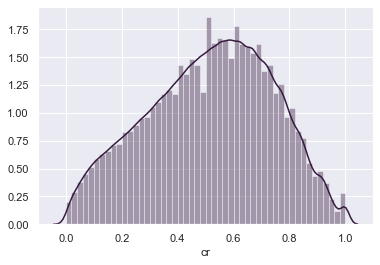

In [5]:
sns.set(style="darkgrid", palette="rocket")
sns.distplot(df.cr)

In [7]:
df.cr.mean()

0.514902610786083

In [9]:
low_cr = df.loc[df.cr < 0.5]
high_cr = df.loc[df.cr >= 0.5]

In [13]:
100*len(low_cr)/len(df)

44.42937154072011

In [14]:
100*len(high_cr)/len(df)

55.57062845927989

The distribution of the completion rate follows a bit the normal distribution just slightly skewed to the right part. This means that on average more than half of the viewers are submitting the form, which is a positive thing.

## Missing data

There are some features where the non-zero data is scarse. Let´s analyze them.

In [16]:
# selecting almost constant features
zero_percent = 100 - (df.astype(bool).sum(axis=0) * 100 / len(df))
zero_value_df = pd.DataFrame({'column_name': df.columns,
                                 'zero_percent': zero_percent})

In [8]:
zero_value_df.sort_values('zero_percent', ascending=False, inplace=True)
zero_value_df

,column_name,zero_percent
feat_04,feat_04,99.900221
feat_20,feat_20,99.786577
feat_26,feat_26,99.329380
feat_31,feat_31,99.173361
feat_32,feat_32,98.986409
feat_15,feat_15,98.951307
feat_35,feat_35,98.949465
feat_10,feat_10,98.773277
feat_12,feat_12,98.102172
feat_13,feat_13,97.893791


There are many features that are almost constant, being zero in more than 95% of the cases. Let´s take the names of all these features. 

In [17]:
constant_95 = zero_value_df.loc[zero_value_df['zero_percent'] >= 95.0,'column_name'].to_list()
constant_95

['feat_03',
 'feat_04',
 'feat_10',
 'feat_12',
 'feat_13',
 'feat_15',
 'feat_18',
 'feat_20',
 'feat_24',
 'feat_26',
 'feat_27',
 'feat_31',
 'feat_32',
 'feat_35',
 'feat_37',
 'feat_39',
 'feat_44']

We have two options now:
1. Delete them as they are almost constant for this dataset and it will be difficult to find patterns in just less than 5% of non-zero data.
2. Transform them into binary features, zero value or one value (for any non-zero value), and analyze them. 

Instead of deleting them we are going to explore the option 2.

In [18]:
# synthetic features
for c in constant_95:
    new_name = c + "_syn"
    df[new_name] = 0
    df.loc[df[c]>0.0,new_name] = 1
df.drop(constant_95, axis=1, inplace=True)

In [19]:
df.columns

Index(['feat_01', 'feat_02', 'feat_05', 'feat_06', 'feat_07', 'feat_08',
       'feat_09', 'feat_11', 'feat_14', 'feat_16', 'feat_17', 'feat_19',
       'feat_21', 'feat_22', 'feat_23', 'feat_25', 'feat_28', 'feat_29',
       'feat_30', 'feat_33', 'feat_34', 'feat_36', 'feat_38', 'feat_40',
       'feat_41', 'feat_42', 'feat_43', 'feat_45', 'feat_46', 'feat_47', 'cr',
       'feat_03_syn', 'feat_04_syn', 'feat_10_syn', 'feat_12_syn',
       'feat_13_syn', 'feat_15_syn', 'feat_18_syn', 'feat_20_syn',
       'feat_24_syn', 'feat_26_syn', 'feat_27_syn', 'feat_31_syn',
       'feat_32_syn', 'feat_35_syn', 'feat_37_syn', 'feat_39_syn',
       'feat_44_syn'],
      dtype='object')

## Outliers

As we discovered during the exploration, there are some features where the maximal values are in a higher range in comparison with other features. We lack information about the features so we cannot prove if those very high values are normal or not because we do not have any context. Having said that we are forced to assume there are no outliers in the dataset.

Let´s just review the maximal values per column and sort them to have an idea about the range differences.

In [20]:
max_per_col = df.max(axis=0)
max_values_df = pd.DataFrame({'column_name': df.columns,
                                 'max_per_col': max_per_col})
max_values_df.sort_values('max_per_col', ascending=False, inplace=True)
max_values_df

,column_name,max_per_col
feat_46,feat_46,2065.0
feat_47,feat_47,1145.0
feat_45,feat_45,590.0
feat_21,feat_21,236.0
feat_23,feat_23,205.0
feat_09,feat_09,165.0
feat_16,feat_16,137.0
feat_41,feat_41,135.0
feat_17,feat_17,135.0
feat_22,feat_22,134.0


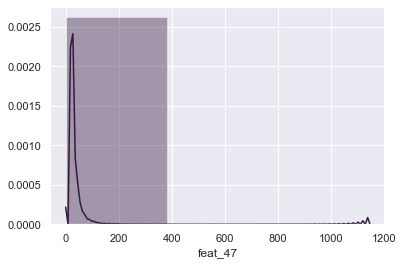

In [15]:
# painting some feature distributions
sns.distplot(df.feat_47, bins=3)

# 2. Data Transformation

After the previous analysis we know all features are numerical, some almost-constant features have been replaced with binary synthetic ones and the remaining ones are not all in the same value range, reaching some the scale of hundreds and thousands. 

## Numerical data
Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed. We are going to apply MinMax Scaler as it preserves the shape of the original distribution.

In [21]:
df.columns

Index(['feat_01', 'feat_02', 'feat_05', 'feat_06', 'feat_07', 'feat_08',
       'feat_09', 'feat_11', 'feat_14', 'feat_16', 'feat_17', 'feat_19',
       'feat_21', 'feat_22', 'feat_23', 'feat_25', 'feat_28', 'feat_29',
       'feat_30', 'feat_33', 'feat_34', 'feat_36', 'feat_38', 'feat_40',
       'feat_41', 'feat_42', 'feat_43', 'feat_45', 'feat_46', 'feat_47', 'cr',
       'feat_03_syn', 'feat_04_syn', 'feat_10_syn', 'feat_12_syn',
       'feat_13_syn', 'feat_15_syn', 'feat_18_syn', 'feat_20_syn',
       'feat_24_syn', 'feat_26_syn', 'feat_27_syn', 'feat_31_syn',
       'feat_32_syn', 'feat_35_syn', 'feat_37_syn', 'feat_39_syn',
       'feat_44_syn'],
      dtype='object')

In [22]:
columns_scale = df.columns[:30]

In [23]:
columns_scale

Index(['feat_01', 'feat_02', 'feat_05', 'feat_06', 'feat_07', 'feat_08',
       'feat_09', 'feat_11', 'feat_14', 'feat_16', 'feat_17', 'feat_19',
       'feat_21', 'feat_22', 'feat_23', 'feat_25', 'feat_28', 'feat_29',
       'feat_30', 'feat_33', 'feat_34', 'feat_36', 'feat_38', 'feat_40',
       'feat_41', 'feat_42', 'feat_43', 'feat_45', 'feat_46', 'feat_47'],
      dtype='object')

In [24]:
# scaling after sythetic and target variables
for col in columns_scale:
    # the min max scaler requires a vector
    # we could have used (0, 1), same effect as no negative values
    transformer = MinMaxScaler().fit(df[col].values.reshape(-1, 1)) # single feature
    transformed_data = transformer.transform(df[col].values.reshape(-1, 1))
    df[col+"_mm"] = transformed_data[:,0]
# remove the original features of the scaled ones
final_df = df.iloc[:,30:]

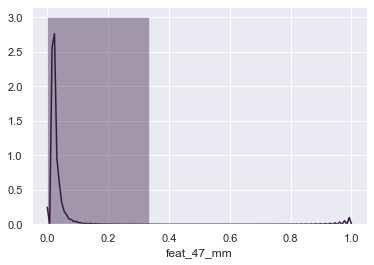

In [25]:
# painting some feature distributions
sns.distplot(df.feat_47_mm, bins=3)

To check that the distribution of the data remains the same after the scaling transformation.

# 3. Correlation

We are assuming that the observations are independent of one another. Besides we want to check *Collinearity* between features.

In [26]:
plt.rcParams["figure.figsize"] = (20,10)
plt.tight_layout()

def paint_correlation_matrix(data, target_column):
    k = data.count(axis=1)[0] 
    corrmat = data.corr()
    cols = corrmat.nlargest(k, target_column)[target_column].index
    cm = np.corrcoef(data[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                     yticklabels=cols.values, xticklabels=cols.values, linewidths=.5)
    plt.show()

<Figure size 1440x720 with 0 Axes>

In [27]:
final_df.columns

Index(['cr', 'feat_03_syn', 'feat_04_syn', 'feat_10_syn', 'feat_12_syn',
       'feat_13_syn', 'feat_15_syn', 'feat_18_syn', 'feat_20_syn',
       'feat_24_syn', 'feat_26_syn', 'feat_27_syn', 'feat_31_syn',
       'feat_32_syn', 'feat_35_syn', 'feat_37_syn', 'feat_39_syn',
       'feat_44_syn', 'feat_01_mm', 'feat_02_mm', 'feat_05_mm', 'feat_06_mm',
       'feat_07_mm', 'feat_08_mm', 'feat_09_mm', 'feat_11_mm', 'feat_14_mm',
       'feat_16_mm', 'feat_17_mm', 'feat_19_mm', 'feat_21_mm', 'feat_22_mm',
       'feat_23_mm', 'feat_25_mm', 'feat_28_mm', 'feat_29_mm', 'feat_30_mm',
       'feat_33_mm', 'feat_34_mm', 'feat_36_mm', 'feat_38_mm', 'feat_40_mm',
       'feat_41_mm', 'feat_42_mm', 'feat_43_mm', 'feat_45_mm', 'feat_46_mm',
       'feat_47_mm'],
      dtype='object')

There are too many features to paint altogether on the same correlation graph so for better visual checking we are splitting in two smaller dataframes. Keep in mind that we checked the global matrix and also the correlation between the features that have been split. The variables that we are going to remove are the ones showing higher correlation values with other features.

In [28]:
corr1 = final_df.iloc[:,:18]
corr1.columns

Index(['cr', 'feat_03_syn', 'feat_04_syn', 'feat_10_syn', 'feat_12_syn',
       'feat_13_syn', 'feat_15_syn', 'feat_18_syn', 'feat_20_syn',
       'feat_24_syn', 'feat_26_syn', 'feat_27_syn', 'feat_31_syn',
       'feat_32_syn', 'feat_35_syn', 'feat_37_syn', 'feat_39_syn',
       'feat_44_syn'],
      dtype='object')

In [29]:
final_df['cr_copy'] = final_df['cr']

In [30]:
corr2 = final_df.iloc[:,18:]
corr2.head()

,feat_01_mm,feat_02_mm,feat_05_mm,feat_06_mm,feat_07_mm,feat_08_mm,feat_09_mm,feat_11_mm,feat_14_mm,feat_16_mm,...,feat_36_mm,feat_38_mm,feat_40_mm,feat_41_mm,feat_42_mm,feat_43_mm,feat_45_mm,feat_46_mm,feat_47_mm,cr_copy
0,0.0,0.000000,0.000000,0.000000,0.008065,0.0,0.006061,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.003390,0.000484,0.001747,0.818182
1,0.0,0.036364,0.000000,0.000000,0.000000,0.0,0.006061,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.755102
2,0.0,0.018182,0.011494,0.000000,0.048387,0.0,0.006061,0.0,0.050633,0.0,...,0.0,0.0,0.0,0.000000,0.011494,0.011494,0.000000,0.000000,0.026201,0.257576
3,0.0,0.036364,0.000000,0.010417,0.016129,0.0,0.012121,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.007407,0.000000,0.000000,0.000000,0.000000,0.006114,0.381818
4,0.0,0.000000,0.011494,0.000000,0.032258,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.011494,0.011494,0.018644,0.003390,0.018341,0.870968


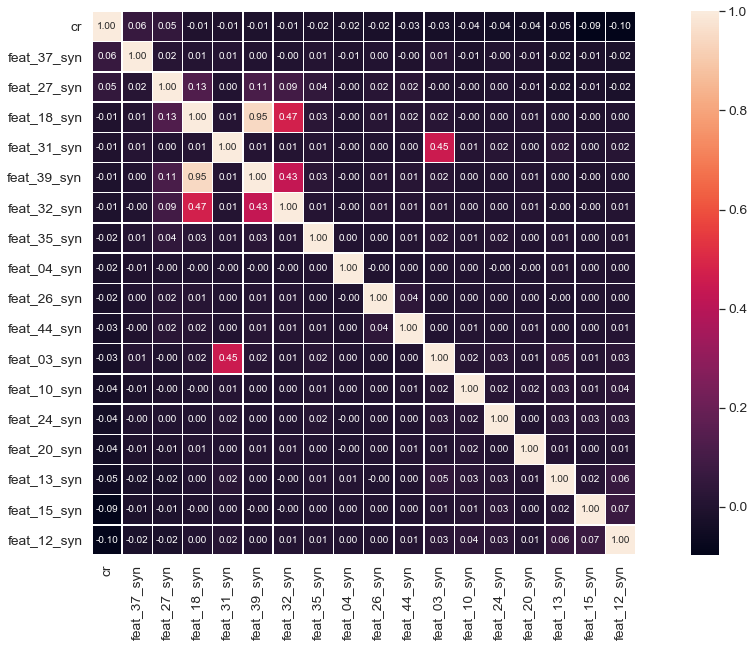

In [25]:
paint_correlation_matrix(corr1, "cr")

Features to delete with 0.01 correlation: feat_18, feat_31, feat_39 and feat_32.

In [26]:
def paint_correlation_matrix(data, target_column):
    k = data.count(axis=1)[0] 
    corrmat = data.corr()
    cols = corrmat.nlargest(k, target_column)[target_column].index
    cm = np.corrcoef(data[cols].values.T)
    sns.set(font_scale=1.05)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, 
                     yticklabels=cols.values, xticklabels=cols.values, cmap="YlGnBu", linewidths=.5)
    plt.show()

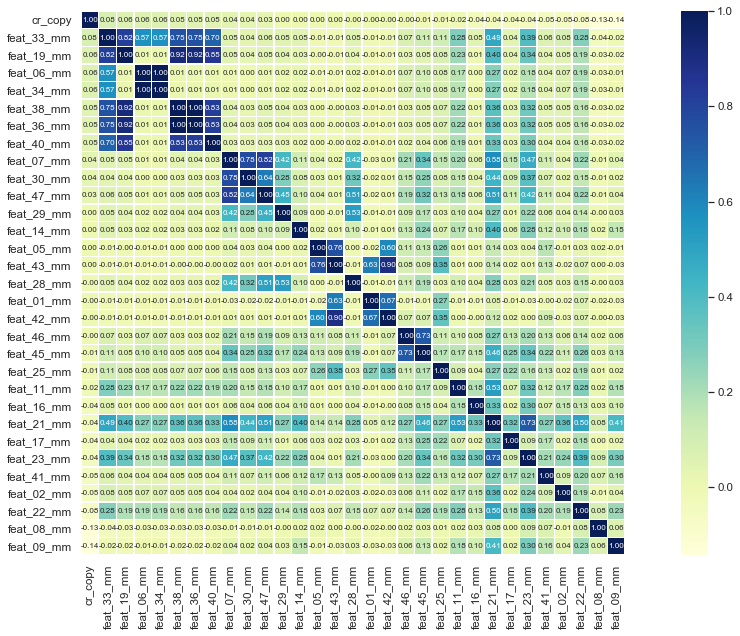

In [27]:
paint_correlation_matrix(corr2, "cr_copy")

Some conclusions from these graphs:
* the correlation values between the features and the target variable, cr, are not too strong.
* there are positive and negative correlation values (for instance feat 08 and feat 09 are negatively correlated with cr).
* there are some features that are highly correlated between each other, so we can reduce the list by removing redundant features. All of these redundant features are very poorly correlated with cr ( < 0.02).

We are removing all features with correlation factors of 0.00 and 0.01 (positive or negative). 
Features to delete: feat_29, feat_14, feat_05, feat_43, feat_28, feat_01, feat_42, feat_46, feat_45 and feat_25.

In [31]:
to_delete = ['feat_18_syn', 'feat_31_syn', 'feat_39_syn', 'feat_32_syn',  
             'feat_29_mm', 'feat_14_mm', 'feat_05_mm', 'feat_43_mm', 'feat_28_mm', 
             'feat_01_mm', 'feat_42_mm', 'feat_46_mm', 'feat_45_mm', 'feat_25_mm']

In [32]:
train_df = final_df.drop(to_delete, axis=1)

In [33]:
train_df.columns

Index(['cr', 'feat_03_syn', 'feat_04_syn', 'feat_10_syn', 'feat_12_syn',
       'feat_13_syn', 'feat_15_syn', 'feat_20_syn', 'feat_24_syn',
       'feat_26_syn', 'feat_27_syn', 'feat_35_syn', 'feat_37_syn',
       'feat_44_syn', 'feat_02_mm', 'feat_06_mm', 'feat_07_mm', 'feat_08_mm',
       'feat_09_mm', 'feat_11_mm', 'feat_16_mm', 'feat_17_mm', 'feat_19_mm',
       'feat_21_mm', 'feat_22_mm', 'feat_23_mm', 'feat_30_mm', 'feat_33_mm',
       'feat_34_mm', 'feat_36_mm', 'feat_38_mm', 'feat_40_mm', 'feat_41_mm',
       'feat_47_mm', 'cr_copy'],
      dtype='object')

In [34]:
train_df = train_df.iloc[:,:-1]
train_df.columns

Index(['cr', 'feat_03_syn', 'feat_04_syn', 'feat_10_syn', 'feat_12_syn',
       'feat_13_syn', 'feat_15_syn', 'feat_20_syn', 'feat_24_syn',
       'feat_26_syn', 'feat_27_syn', 'feat_35_syn', 'feat_37_syn',
       'feat_44_syn', 'feat_02_mm', 'feat_06_mm', 'feat_07_mm', 'feat_08_mm',
       'feat_09_mm', 'feat_11_mm', 'feat_16_mm', 'feat_17_mm', 'feat_19_mm',
       'feat_21_mm', 'feat_22_mm', 'feat_23_mm', 'feat_30_mm', 'feat_33_mm',
       'feat_34_mm', 'feat_36_mm', 'feat_38_mm', 'feat_40_mm', 'feat_41_mm',
       'feat_47_mm'],
      dtype='object')

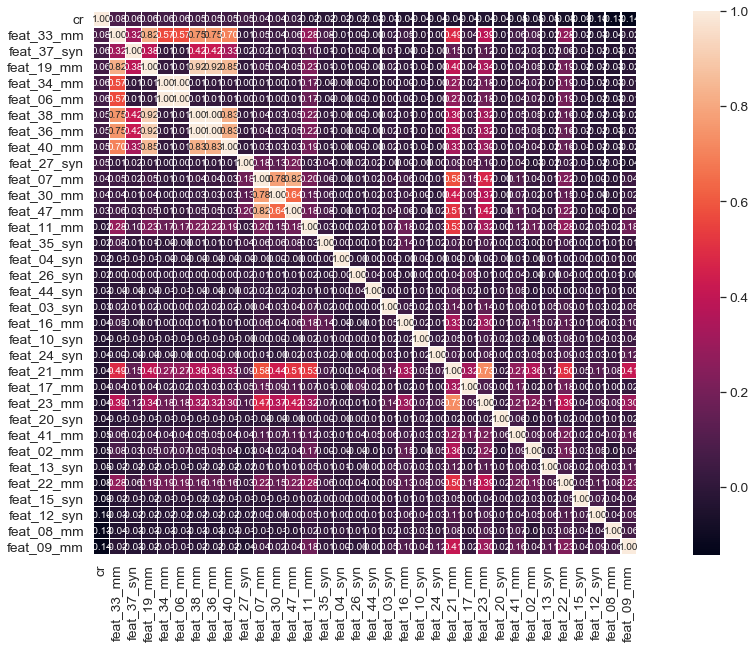

In [35]:
paint_correlation_matrix(train_df, "cr")

In [36]:
more_to_delete = ['feat_19_mm', 'feat_38_mm', 'feat_36_mm', 'feat_40_mm', 'feat_47_mm']

In [37]:
train_df.drop(more_to_delete, axis=1, inplace=True)

# 4. Saving the training dataset

In [38]:
train_df.to_pickle("../data/training_df")